<a href="https://colab.research.google.com/github/chua-dev/ECCV20-STDN/blob/master/Chua_face_detection_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

https://drive.google.com/file/d/1UjNkVw6dTeZw7meky1LC8pOPqk0lAozg/view?usp=sharing

In [ ]:
!gdown --id  1UjNkVw6dTeZw7meky1LC8pOPqk0lAozg

Downloading...
From: https://drive.google.com/uc?id=1UjNkVw6dTeZw7meky1LC8pOPqk0lAozg
To: /content/opencv_face_detector.zip
100% 1.67M/1.67M [00:00<00:00, 26.1MB/s]


In [ ]:
!unzip opencv_face_detector.zip

Archive:  opencv_face_detector.zip
  inflating: opencv_face_detector.pbtxt  
  inflating: opencv_face_detector_uint8.pb  


In [ ]:
model  = cv2.dnn.readNetFromTensorflow(
                "opencv_face_detector_uint8.pb", "opencv_face_detector.pbtxt")

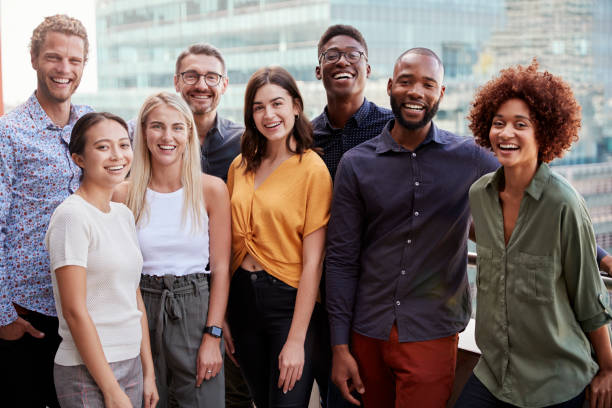

In [ ]:
img = cv2.imread("group photo.jpg")
cv2_imshow(img)

In [ ]:
height,width,channel = img.shape

In [ ]:
blob = cv2.dnn.blobFromImage(
                    img, 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
model.setInput(blob)
detections = model.forward()

In [ ]:
detections.shape

(1, 1, 200, 7)

[0.         1.         0.9981013  0.4084376  0.20171715 0.4836604
 0.34211773]
[0.         1.         0.9975349  0.28886127 0.13232103 0.3656398
 0.27713656]
[0.         1.         0.9965778  0.6375292  0.14901015 0.7178779
 0.3053498 ]
[0.         1.         0.9916426  0.06056055 0.08570899 0.13964556
 0.24074624]
[0.         1.         0.9890592  0.14041518 0.2956915  0.22099371
 0.4518605 ]
[0.         1.         0.98856676 0.23596424 0.25048694 0.3097242
 0.40436068]
[0.         1.         0.9716322  0.5211509  0.08604777 0.5979336
 0.22855324]
[0.         1.         0.96353996 0.79757804 0.2351523  0.8783007
 0.41185206]


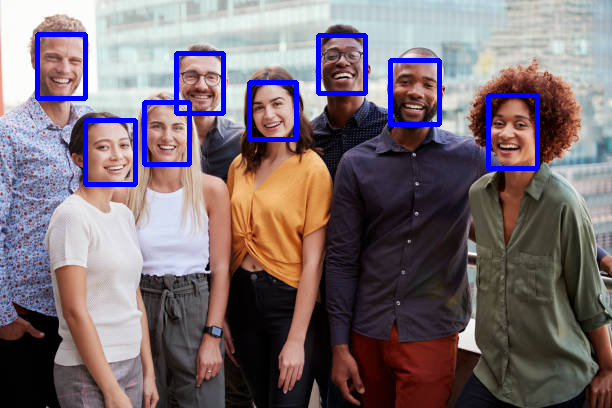

In [ ]:
for i in range(detections.shape[2]):

  confidence = detections[0,0,i,2]
  if confidence > 0.9:
    print(detections[0,0,i])
    x1 = int(detections[0,0,i,3]*width)
    y1 = int(detections[0,0,i,4]*height)
    x2 = int(detections[0,0,i,5]*width)
    y2 = int(detections[0,0,i,6]*height)
    img = cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),3)
    
cv2_imshow(img)

In [ ]:
def show_face(file_name):
  img = cv2.imread(file_name)
  height,width,channel = img.shape
  blob = cv2.dnn.blobFromImage(
                    img, 1.0, (300, 300), (104.0, 177.0, 123.0))
  model.setInput(blob)
  detections = model.forward()
  for i in range(detections.shape[2]):

    confidence = detections[0,0,i,2]
    if confidence > 0.85:
      x1 = int(detections[0,0,i,3]*width)
      y1 = int(detections[0,0,i,4]*height)
      x2 = int(detections[0,0,i,5]*width)
      y2 = int(detections[0,0,i,6]*height)
      img = cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),3)
    
  cv2_imshow(img)



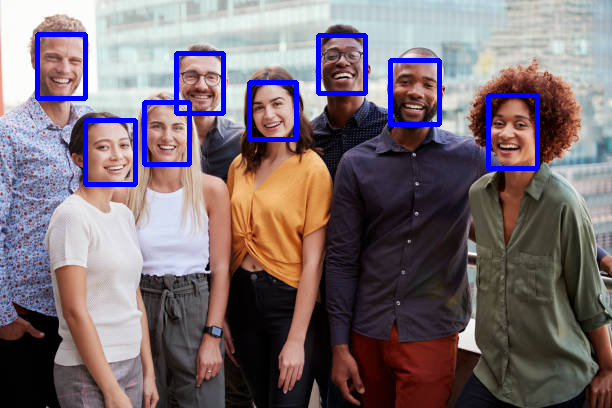

In [ ]:
show_face("group photo.jpg")

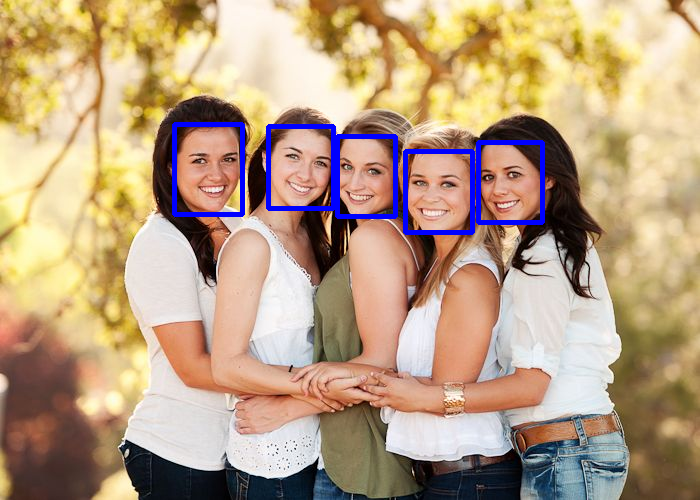

In [ ]:
show_face("ww.jpg")